# <center>msat_interface.msat_collection example</center>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # full width notebook

import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from msatutil.msat_interface import msat_collection

**msat_collection** can load data from multiple **L1B / L2 / L2-post-processed / L3** files under a directory

Here we load a MethaneSAT L2 post-processed file

In [2]:
l2 = msat_collection(["MethaneSAT_L2_post_20240911T203025_20240911T203057_manualscreen.nc"])

In [3]:
l2

msat_collection:
        number of files: 1
        valid_xtrack: slice(19, 2031, None)
        use_dask: True
        is_l1: False
        is_l2: True
        is_l3: False
        is_postproc: True
        is_l2_met: False
        

Use the **search** method to quickly find variables

In [4]:
l2.search('xch4')

product_co2proxy/xch4_co2proxy ('along_track', 'across_track')
product_co2proxy/xch4_co2proxy_randerr ('along_track', 'across_track')
product_co2proxy/xch4_co2proxy_vcdcor ('along_track', 'across_track')
product_o2proxy/xch4_o2proxy_vcdcor ('along_track', 'across_track')
product_o2proxy/xch4_o2proxy_randerr ('along_track', 'across_track')
co2proxy_fit_diagnostics/xch4_co2proxy_raw ('along_track', 'across_track')
co2proxy_fit_diagnostics/xch4_o2proxy_raw ('along_track', 'across_track')
co2proxy_fit_diagnostics/xch4_o2proxy ('along_track', 'across_track')
apriori_data/xch4 ('along_track', 'across_track')


Methods like **pmesh_prep**, **grid_prep**, and **heatmap**, search for the matching variable in the same way and will use the first match returned by **search** if there are multiple instances like above
To get a variable from one of the other matches, we need to use the full variable name

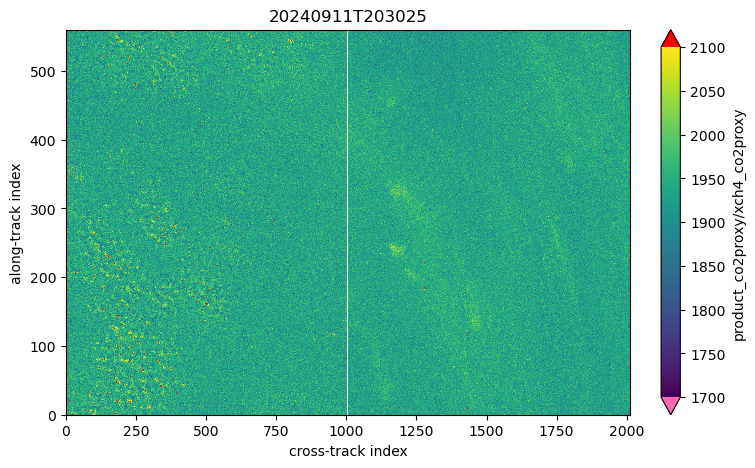

In [5]:
xch4 = l2.heatmap('product_co2proxy/xch4_co2proxy',vmin=1700,vmax=2100,use_valid_xtrack=True)

By default **heatmap** plots the variable vs cross- and along-track indices.

The plot can be made in latitude and longitude with the **latlon** argument; it will be plotted over a Google Imagery background tile with a scalebar

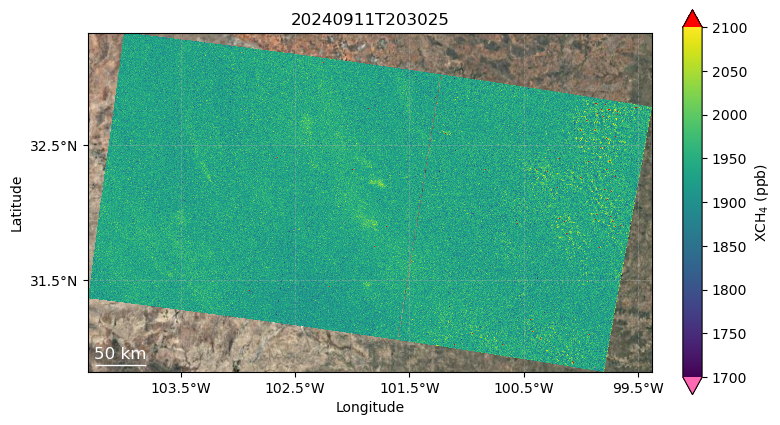

In [10]:
xch4 = l2.heatmap('product_co2proxy/xch4_co2proxy',vmin=1700,vmax=2100,latlon=True,latlon_step=1,colorbar_label="XCH$_4$ (ppb)")

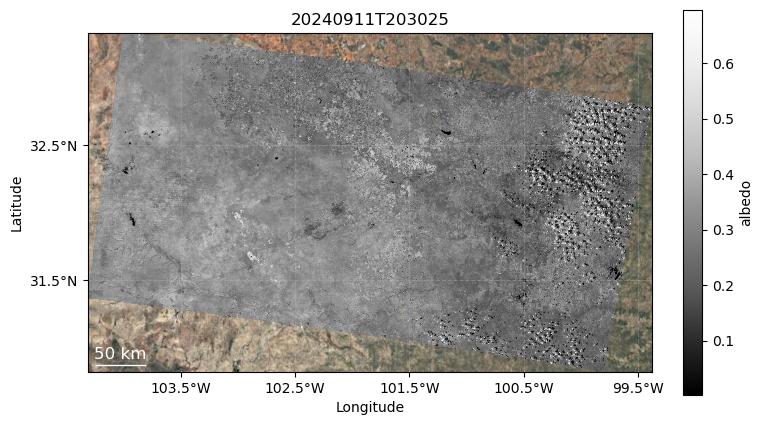

In [7]:
alb = l2.heatmap("albedo",cmap="Greys_r",latlon=True,latlon_step=1)

We can see clouds in the East of the target with associated artifacts in the unscreened XCH$_4$.<br>
During L2 post-processing, quality flags are derived for each pixels to screen out clouds, cloud shadows, and pixels that don't meet our quality criteria.<br>
<br>
Below we use the flags to mask out the bad quality (flag>0) data before plotting.

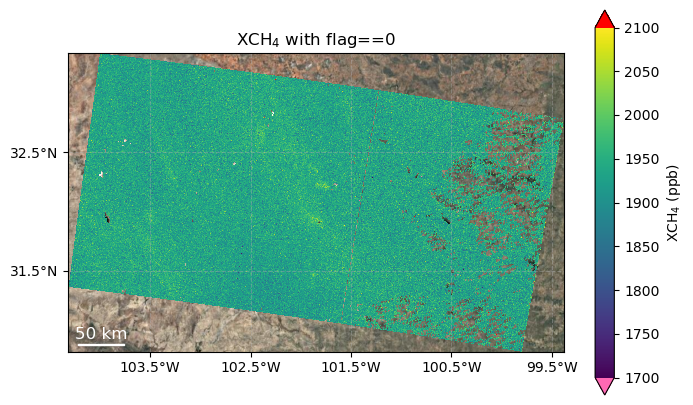

In [8]:
lon = l2.pmesh_prep("longitude",use_valid_xtrack=True).compute()
lat = l2.pmesh_prep("latitude",use_valid_xtrack=True).compute()
xch4 = l2.pmesh_prep('product_co2proxy/xch4_co2proxy',use_valid_xtrack=True).compute()
flag = l2.pmesh_prep("flag",use_valid_xtrack=True).compute()
xch4[flag>0] = np.nan

fig,ax =  plt.subplots()
fig.set_size_inches(8,5)
ax.set_title("XCH$_4$ with flag==0")
m = msat_collection._make_heatmap_with_background_tile(ax,lon,lat,xch4,vmin=1700,vmax=2100,latlon_step=1)
m.cmap.set_over("red")
m.cmap.set_under("hotpink")
plt.colorbar(m,ax=ax,extend="both",label="XCH$_4$ (ppb)")

The **latlon** argument makes use of the pixel center Latitude and Longitude with matplotlib's pcolormesh<br>
This doesn't represent the exact shape of pixels when fully zoomed in<br>

**heatmap** can also be given the **use_corners** argument to create a map using matplotlib's PolyCollection, this faithfully represents the ground pixels even when zoomed in.

Build polygons: 100%|██████████| 560/560 [00:28<00:00, 19.38it/s]


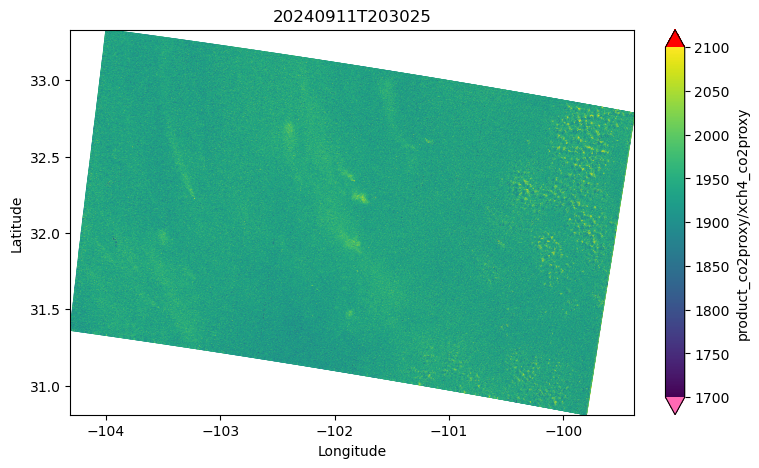

In [9]:
xch4 = l2.heatmap('product_co2proxy/xch4_co2proxy',vmin=1700,vmax=2100,use_corners=True)

All the groups and variables (indented under their group) with their dimensions can be shown with the **show_all** method

You can also use the **msat_collection** object to read in latitude,longitude, and a variable of interest and create interactive graphs as described in the **[mair_geoviews notebook](https://github.com/rocheseb/msatutil/blob/master/notebooks/mair_geoviews.ipynb)**